In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


import keras
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os
import io
import requests


Using TensorFlow backend.


In [115]:
#functions

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834


def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    #data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
     #  'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
      # 'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m

#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['accuracy'])
    
    # print(model.summary())
    return(model)


#optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),

def save_model(model,string):
        model.save("heart_attack_risk_prediction_"+string+".h5")
    
def user_data_predict(model,data):
    data = np.expand_dims(data, axis=0)
    predections = model.predict_classes(data,batch_size=20,verbose=0)
    return predections

#to plot the traning and test accuracy
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)
    

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
 

In [116]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]


In [132]:
#data_frame = read_csv_798()

data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

834
834
834


In [133]:
data_set = create_data_set(data_frame)

In [134]:
for i in data_set:
    asd = i
    print(i)
    break

[58.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.]


In [135]:
actual_x,actual_y = x_data_y_data_create_4(data_set)

In [136]:
len(data_set[0])

17

In [137]:
len(actual_x[0])

13

In [138]:
len(actual_y[0])

2

In [139]:
batch_size = 20
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0.0

n_Of_fold = 10
kf = KFold(n_Of_fold)
fold_no = 0

score = 0.0
best_score = 0.0
best_model = Sequential()

terget_names = ["NO","YES"]


fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.1350 - acc: 0.5520 - val_loss: 0.1110 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.1232 - acc: 0.5733 - val_loss: 0.1124 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: 0.1043 - acc: 0.6453 - val_loss: 0.1052 - val_acc: 0.6310
Epoch 4/100
 - 0s - loss: 0.1017 - acc: 0.6587 - val_loss: 0.1012 - val_acc: 0.6310
Epoch 5/100
 - 0s - loss: 0.1043 - acc: 0.6787 - val_loss: 0.0969 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.1013 - acc: 0.6827 - val_loss: 0.0967 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.0957 - acc: 0.7040 - val_loss: 0.0984 - val_acc: 0.6667
Epoch 8/100
 - 0s - loss: 0.0961 - acc: 0.6947 - val_loss: 0.0960 - val_acc: 0.6786
Epoch 9/100
 - 0s - loss: 0.0940 - acc: 0.7160 - val_loss: 0.0970 - val_acc: 0.6429
Epoch 10/100
 - 0s - loss: 0.0951 - acc: 0.7240 - val_loss: 0.0977 - val_acc: 0.6786
Epoch 11/100
 - 0s - loss: 0.0983 - acc: 0.7013 - val_loss: 0.0962 - val_acc: 0.6786
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0865 - acc: 0.7467 - val_loss: 0.1014 - val_acc: 0.6905
Epoch 98/100
 - 0s - loss: 0.0860 - acc: 0.7387 - val_loss: 0.0994 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.0856 - acc: 0.7387 - val_loss: 0.0997 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.0856 - acc: 0.7440 - val_loss: 0.1035 - val_acc: 0.7024


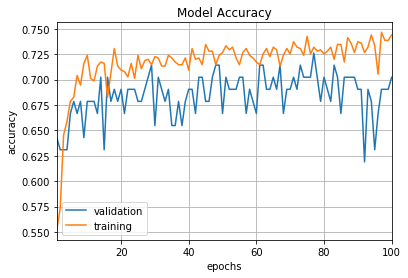

84/84 [==============================] - 0s 176us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10348084994724818, 0.7023809467043195]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.1118 - acc: 0.6133 - val_loss: 0.1207 - val_acc: 0.4881
Epoch 2/100
 - 0s - loss: 0.1120 - acc: 0.6267 - val_loss: 0.1360 - val_acc: 0.4881
Epoch 3/100
 - 0s - loss: 0.1088 - acc: 0.6200 - val_loss: 0.1198 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.1084 - acc: 0.6333 - val_loss: 0.1249 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.1068 - acc: 0.6453 - val_loss: 0.1153 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.1009 - acc: 0.6773 - val_loss: 0.1142 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.0968 - acc: 0.7093 - val_loss: 0.1116 - val_acc: 0.6310
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0851 - acc: 0.7533 - val_loss: 0.1143 - val_acc: 0.6071
Epoch 94/100
 - 0s - loss: 0.0849 - acc: 0.7547 - val_loss: 0.1082 - val_acc: 0.6071
Epoch 95/100
 - 0s - loss: 0.0851 - acc: 0.7493 - val_loss: 0.1191 - val_acc: 0.5833
Epoch 96/100
 - 0s - loss: 0.0855 - acc: 0.7507 - val_loss: 0.1174 - val_acc: 0.5595
Epoch 97/100
 - 0s - loss: 0.0859 - acc: 0.7480 - val_loss: 0.1101 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.0863 - acc: 0.7427 - val_loss: 0.1178 - val_acc: 0.6071
Epoch 99/100
 - 0s - loss: 0.0853 - acc: 0.7467 - val_loss: 0.1140 - val_acc: 0.6071
Epoch 100/100
 - 0s - loss: 0.0842 - acc: 0.7560 - val_loss: 0.1229 - val_acc: 0.6071


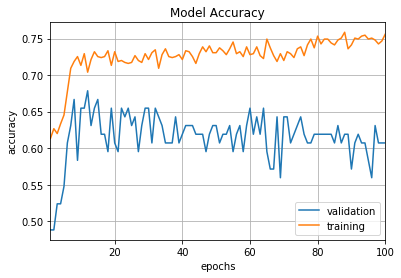

84/84 [==============================] - 0s 165us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.12294391436236245, 0.6071428599811736]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.1253 - acc: 0.6013 - val_loss: 0.1475 - val_acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.1095 - acc: 0.6160 - val_loss: 0.1210 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.1055 - acc: 0.6413 - val_loss: 0.1069 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.1042 - acc: 0.6360 - val_loss: 0.1076 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.0992 - acc: 0.6667 - val_loss: 0.0989 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.0974 - acc: 0.6947 - val_loss: 0.0915 - val_acc: 0.7381
Epoch 7/100
 - 0s - loss: 0.0980 - acc: 0.6893 - val_loss: 0.0964 - val_acc: 0.6786
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0910 - acc: 0.7107 - val_loss: 0.0877 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.0904 - acc: 0.7253 - val_loss: 0.0903 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.0893 - acc: 0.7360 - val_loss: 0.0930 - val_acc: 0.6905
Epoch 96/100
 - 0s - loss: 0.0911 - acc: 0.7173 - val_loss: 0.1061 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.0902 - acc: 0.7187 - val_loss: 0.0930 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0911 - acc: 0.7253 - val_loss: 0.1138 - val_acc: 0.6429
Epoch 99/100
 - 0s - loss: 0.0891 - acc: 0.7173 - val_loss: 0.0999 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.0892 - acc: 0.7280 - val_loss: 0.0880 - val_acc: 0.7143


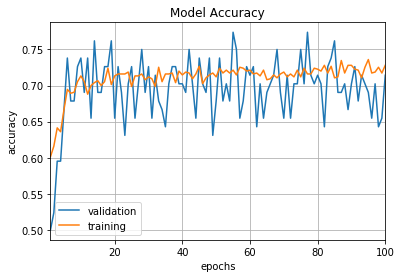

84/84 [==============================] - 0s 127us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.08797193708873931, 0.7142857171240307]
 best Score: 0.7142857171240307          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.1406 - acc: 0.5453 - val_loss: 0.1008 - val_acc: 0.6548
Epoch 2/100
 - 0s - loss: 0.1104 - acc: 0.6160 - val_loss: 0.0991 - val_acc: 0.6905
Epoch 3/100
 - 0s - loss: 0.1073 - acc: 0.6360 - val_loss: 0.0952 - val_acc: 0.6548
Epoch 4/100
 - 0s - loss: 0.1057 - acc: 0.6520 - val_loss: 0.0922 - val_acc: 0.7024
Epoch 5/100
 - 0s - loss: 0.1034 - acc: 0.6707 - val_loss: 0.1001 - val_acc: 0.7500
Epoch 6/100
 - 0s - loss: 0.1081 - acc: 0.6413 - val_loss: 0.0992 - val_acc: 0.6905
Epoch 7/100
 - 0s - loss: 0.1016 - acc: 0.6680 - val_loss: 0.1033 - val_acc: 0.6786
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0893 - acc: 0.7280 - val_loss: 0.0964 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.0888 - acc: 0.7333 - val_loss: 0.0977 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.0888 - acc: 0.7280 - val_loss: 0.0929 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.0899 - acc: 0.7187 - val_loss: 0.0933 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.0882 - acc: 0.7360 - val_loss: 0.1004 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.0884 - acc: 0.7333 - val_loss: 0.0953 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.0891 - acc: 0.7307 - val_loss: 0.0944 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.0874 - acc: 0.7387 - val_loss: 0.0941 - val_acc: 0.7262


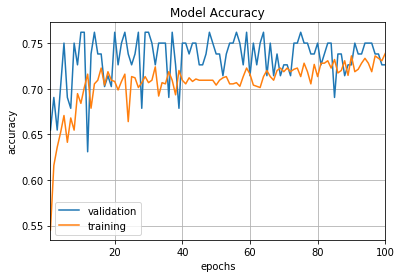

84/84 [==============================] - 0s 148us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.09414655289479665, 0.7261904733521598]
 best Score: 0.7261904733521598          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1246 - acc: 0.5779 - val_loss: 0.1190 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1120 - acc: 0.6099 - val_loss: 0.1141 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.1108 - acc: 0.6232 - val_loss: 0.1167 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.1091 - acc: 0.6272 - val_loss: 0.1117 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.1082 - acc: 0.6285 - val_loss: 0.1104 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1052 - acc: 0.6445 - val_loss: 0.1127 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.1032 - acc: 0.6698 - val_loss: 0.1069 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0880 - acc: 0.7284 - val_loss: 0.1001 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.0904 - acc: 0.7204 - val_loss: 0.0999 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.0889 - acc: 0.7324 - val_loss: 0.1005 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.0893 - acc: 0.7244 - val_loss: 0.0999 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.0894 - acc: 0.7337 - val_loss: 0.0993 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.0875 - acc: 0.7324 - val_loss: 0.1016 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.0887 - acc: 0.7324 - val_loss: 0.1023 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.0914 - acc: 0.7190 - val_loss: 0.0992 - val_acc: 0.6627


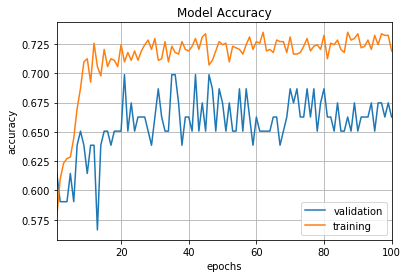

83/83 [==============================] - 0s 169us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.09924542176795292, 0.6626506002552538]
 best Score: 0.7261904733521598          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1193 - acc: 0.5819 - val_loss: 0.1134 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.1128 - acc: 0.6019 - val_loss: 0.1128 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.1108 - acc: 0.6019 - val_loss: 0.1126 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.1094 - acc: 0.6045 - val_loss: 0.1111 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.1057 - acc: 0.6298 - val_loss: 0.1111 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.1025 - acc: 0.6631 - val_loss: 0.1096 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1009 - acc: 0.6911 - val_loss: 0.1088 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0890 - acc: 0.7337 - val_loss: 0.1028 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.0878 - acc: 0.7403 - val_loss: 0.1034 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.0883 - acc: 0.7337 - val_loss: 0.1022 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.0879 - acc: 0.7364 - val_loss: 0.1026 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.0886 - acc: 0.7350 - val_loss: 0.1025 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.0879 - acc: 0.7403 - val_loss: 0.1033 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.0871 - acc: 0.7390 - val_loss: 0.1085 - val_acc: 0.6386
Epoch 100/100
 - 0s - loss: 0.0904 - acc: 0.7257 - val_loss: 0.1048 - val_acc: 0.6627


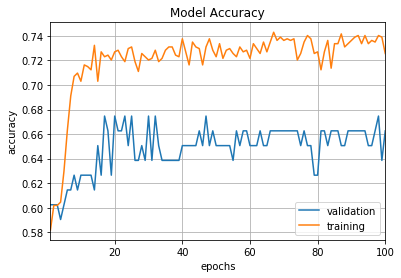

83/83 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.10478852393038302, 0.6626506016915104]
 best Score: 0.7261904733521598          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1245 - acc: 0.5766 - val_loss: 0.1012 - val_acc: 0.6627
Epoch 2/100
 - 0s - loss: 0.1107 - acc: 0.6045 - val_loss: 0.1035 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1090 - acc: 0.6125 - val_loss: 0.1057 - val_acc: 0.6747
Epoch 4/100
 - 0s - loss: 0.1080 - acc: 0.6152 - val_loss: 0.0956 - val_acc: 0.6627
Epoch 5/100
 - 0s - loss: 0.1072 - acc: 0.6498 - val_loss: 0.0959 - val_acc: 0.7108
Epoch 6/100
 - 0s - loss: 0.1052 - acc: 0.6391 - val_loss: 0.0942 - val_acc: 0.7349
Epoch 7/100
 - 0s - loss: 0.1045 - acc: 0.6778 - val_loss: 0.0961 - val_acc: 0.7470
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0909 - acc: 0.7150 - val_loss: 0.0740 - val_acc: 0.7952
Epoch 94/100
 - 0s - loss: 0.0909 - acc: 0.7164 - val_loss: 0.0849 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.0916 - acc: 0.7057 - val_loss: 0.0746 - val_acc: 0.7831
Epoch 96/100
 - 0s - loss: 0.0909 - acc: 0.7057 - val_loss: 0.0737 - val_acc: 0.8193
Epoch 97/100
 - 0s - loss: 0.0910 - acc: 0.7230 - val_loss: 0.0735 - val_acc: 0.8193
Epoch 98/100
 - 0s - loss: 0.0911 - acc: 0.7230 - val_loss: 0.0773 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.0911 - acc: 0.7137 - val_loss: 0.0755 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.0906 - acc: 0.7124 - val_loss: 0.0741 - val_acc: 0.7831


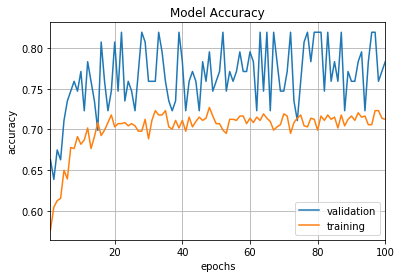

83/83 [==============================] - 0s 125us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.07410945141889963, 0.7831325365836361]
 best Score: 0.7831325365836361          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.1167 - acc: 0.5912 - val_loss: 0.1111 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1107 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1152 - acc: 0.5979 - val_loss: 0.1104 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1104 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1108 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1107 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1110 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1108 - val_acc: 0.6386
Epoch 94/100
 - 0s - loss: 0.1150 - acc: 0.5979 - val_loss: 0.1109 - val_acc: 0.6386
Epoch 95/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1108 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.1150 - acc: 0.5979 - val_loss: 0.1109 - val_acc: 0.6386
Epoch 97/100
 - 0s - loss: 0.1150 - acc: 0.5979 - val_loss: 0.1106 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.1152 - acc: 0.5979 - val_loss: 0.1108 - val_acc: 0.6386
Epoch 99/100
 - 0s - loss: 0.1150 - acc: 0.5979 - val_loss: 0.1107 - val_acc: 0.6386
Epoch 100/100
 - 0s - loss: 0.1151 - acc: 0.5979 - val_loss: 0.1110 - val_acc: 0.6386


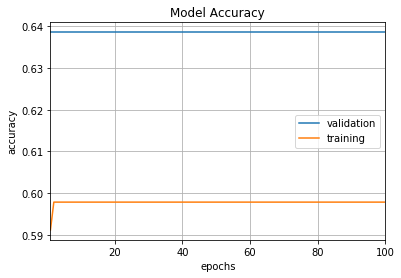

83/83 [==============================] - 0s 263us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.1109735271837338, 0.6385542211762394]
 best Score: 0.7831325365836361          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.1159 - acc: 0.5925 - val_loss: 0.1181 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.1122 - acc: 0.5885 - val_loss: 0.1041 - val_acc: 0.7229
Epoch 3/100
 - 0s - loss: 0.1080 - acc: 0.6205 - val_loss: 0.1030 - val_acc: 0.7711
Epoch 4/100
 - 0s - loss: 0.1036 - acc: 0.6431 - val_loss: 0.1001 - val_acc: 0.7590
Epoch 5/100
 - 0s - loss: 0.1014 - acc: 0.6684 - val_loss: 0.0880 - val_acc: 0.7831
Epoch 6/100
 - 0s - loss: 0.0983 - acc: 0.6964 - val_loss: 0.0986 - val_acc: 0.7349
Epoch 7/100
 - 0s - loss: 0.0969 - acc: 0.6977 - val_loss: 0.0870 - val_acc: 0.7470
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0914 - acc: 0.7257 - val_loss: 0.0825 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.0933 - acc: 0.7190 - val_loss: 0.0875 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.0914 - acc: 0.7190 - val_loss: 0.0901 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.0911 - acc: 0.7257 - val_loss: 0.0884 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.0914 - acc: 0.7230 - val_loss: 0.1013 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.0932 - acc: 0.7190 - val_loss: 0.0934 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.0922 - acc: 0.7111 - val_loss: 0.0846 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0908 - acc: 0.7244 - val_loss: 0.0986 - val_acc: 0.6627


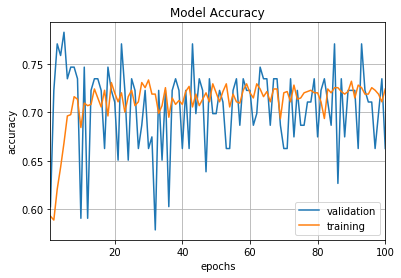

83/83 [==============================] - 0s 191us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.09856184563004827, 0.662650603845895]
 best Score: 0.7831325365836361          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.1128 - acc: 0.6019 - val_loss: 0.1138 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.1115 - acc: 0.6045 - val_loss: 0.1144 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.1107 - acc: 0.6045 - val_loss: 0.1122 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.1107 - acc: 0.6072 - val_loss: 0.1106 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.1086 - acc: 0.6125 - val_loss: 0.1096 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.1069 - acc: 0.6258 - val_loss: 0.1023 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1013 - acc: 0.6764 - val_loss: 0.0946 - val_acc: 0.7590
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0912 - acc: 0.7164 - val_loss: 0.0795 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.0912 - acc: 0.7230 - val_loss: 0.0849 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.0909 - acc: 0.7137 - val_loss: 0.0837 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.0910 - acc: 0.7177 - val_loss: 0.0870 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.0907 - acc: 0.7177 - val_loss: 0.0811 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.0900 - acc: 0.7244 - val_loss: 0.0898 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.0916 - acc: 0.7084 - val_loss: 0.0913 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.0910 - acc: 0.7190 - val_loss: 0.0810 - val_acc: 0.7590


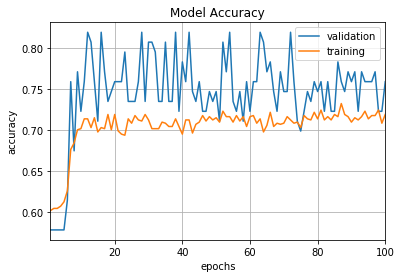

83/83 [==============================] - 0s 175us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.0809570550469749, 0.7590361460145697]
 best Score: 0.7831325365836361          
-------------------------------------------------------------------------------------------




In [146]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]
    
    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.logcosh,
                  optimizer=optimizers.Adamax(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=20,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [147]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7831325365836361
0.6918674706728788


[[0.10348084994724818, 0.7023809467043195],
 [0.12294391436236245, 0.6071428599811736],
 [0.08797193708873931, 0.7142857171240307],
 [0.09414655289479665, 0.7261904733521598],
 [0.09924542176795292, 0.6626506002552538],
 [0.10478852393038302, 0.6626506016915104],
 [0.07410945141889963, 0.7831325365836361],
 [0.1109735271837338, 0.6385542211762394],
 [0.09856184563004827, 0.662650603845895],
 [0.0809570550469749, 0.7590361460145697]]

In [148]:
kfold_accuracy_score_store

[0.7439999997615814,
 0.7559999974568685,
 0.7280000011126201,
 0.7386666655540466,
 0.7190412779781377,
 0.7256990685840738,
 0.712383489554795,
 0.5978695114506545,
 0.7243675109390889,
 0.7190412775813025]

In [92]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.9047619047619048
0.8104274243082182


[[0.5371161074865431, 0.7619047619047619],
 [0.4575176551228478, 0.8571428543045407],
 [0.32874834821337745, 0.9047619047619048],
 [0.4482829201789129, 0.8214285714285714],
 [0.67730290559401, 0.5903614482965814],
 [0.4425966298005667, 0.8192771148968891],
 [0.4789605431527977, 0.7951807243278227],
 [0.4784078949905304, 0.8192771098699915],
 [0.39669558190437687, 0.8313252990504345],
 [0.3047607264604913, 0.9036144542406841]]

In [93]:
kfold_accuracy_score_store

[0.8479999963442485,
 0.8359999950726827,
 0.8333333277702332,
 0.8399999944368998,
 0.6031957449274914,
 0.8521970658899147,
 0.8548601791163418,
 0.8442077152579824,
 0.844207718432664,
 0.8388814870590535]

In [23]:
best_score

0.9156626470117684

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_82 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_83 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 14        
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.evaluate(test_x,test_y)

83/83 [==============================] - 0s 166us/step


[0.05480730246348554, 0.8554216896195009]

In [27]:
asd = user_data_predict(model,[50, 1,0,1,0,1,0,1,1,1,1,0,0,0])

In [28]:
asd


array([1])

In [29]:
rounded_predections = model.predict_classes(test_x,batch_size=10,verbose=0)

In [30]:
rounded_predections

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
cm = confussion_matrix_generator(test_y,pred)

In [41]:
test_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [36]:
len(test_x)


83

In [38]:
pred = model.predict(test_x)

In [39]:
pred

array([[0.88144183, 0.11855818],
       [0.9374134 , 0.06258661],
       [0.95501673, 0.04498323],
       [0.0439274 , 0.9560726 ],
       [0.72128606, 0.27871397],
       [0.94530743, 0.05469254],
       [0.85756594, 0.14243409],
       [0.92832476, 0.07167523],
       [0.10520583, 0.8947942 ],
       [0.964306  , 0.03569394],
       [0.8418156 , 0.15818445],
       [0.34191853, 0.6580815 ],
       [0.09538776, 0.90461224],
       [0.9309043 , 0.06909569],
       [0.9652363 , 0.0347637 ],
       [0.92208475, 0.07791523],
       [0.08182733, 0.91817266],
       [0.09549076, 0.90450925],
       [0.5182876 , 0.4817124 ],
       [0.15646699, 0.84353304],
       [0.9347633 , 0.06523667],
       [0.94525415, 0.05474583],
       [0.9563324 , 0.04366761],
       [0.9049465 , 0.09505353],
       [0.75644505, 0.243555  ],
       [0.926666  , 0.07333399],
       [0.9288753 , 0.07112471],
       [0.808026  , 0.19197397],
       [0.93140894, 0.06859103],
       [0.08761616, 0.9123838 ],
       [0.